# Week 8: Machine Learning with Scikit-Learn

Scikit-learn is a great library for creating machine learning models from data. Before you can fit a model using scikit-learn, your data has to be in a recognizable format. Scikit-learn works well with numeric data that is stored in numpy arrays. Additionally, you can convert your data from objects like pandas dataframes to numpy arrays. Today, we will look into how you can make your data a more acceptable input for scikit-learn. 

### Overview

- [Features Matrix and Target Vector](#Features-Matrix-and-Target-Vector)
- [Linear Regression](#Linear-Regression)
- [train_test_split method](#train_test_split-method)
- [Logistic Regression](#Logistic-Regression)
- [Logistic Regression Multiclass Classification](#Logistic-Regression-Multiclass-Classification)
- [Decision Trees](#Decision-Trees)
- [Random Forests](#Random-Forests)
  - [Assessing feature importance with Random Forests](#Assessing-feature-importance-with-Random-Forests)
-[KMeans Clustering](#KMeans-Clustering)
-[Principal Component Analysis](#Principal-Component-Analysis)
  - [PCA for data visualization](#PCA-for-data-visualization)
  - [PCA for speeding up the process](#PCA-for-speeding-up-the-process)
-[Pipelines](#Pipelines)

## Features Matrix and Target Vector

The first thing you need to know is what Scikit-Learn expects for Features Matrices and target vectors. In scikit-learn, a features matrix is a two-dimensional grid of data where rows represent samples and columns represent features. A target vector is usually one dimensional and in the case of supervised learning, what you want to predict from the data. 

![images](../images/featuresMatrixTargetVector.png)

Let's see an example of this. The below image is a pandas dataframe of the first 5 rows of the iris dataset. A single flower represent one row of the dataset and the flower measurements are the columns. In this dataset, the species column is what you are trying to predict. 

![images](../images/irisFeatureTarget.png)

Let's now go over how to make sure your data is in an acceptable format.

## Import Libraries

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

## Load the Dataset
Loading the Iris dataset from scikit-learn. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [ ]:
data = load_iris()

#below you can see the formatting sklearn expects from us

# the independent variables
data.data

# the dependent variable
data.target

# the column names
data.feature_names

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target #dependent variable
df.head()

In [ ]:
## Do not run this code for now

# Alternatively, you can load the iris dataset from a website link, 
# as you might need to do this often times for your own dataset(s).

import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8') # change the encoding, if needed, for your own your dataset
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

## Arrange Data into Features Matrix and Target Vector

In [ ]:
feature_names = ['sepal length (cm)',
                 'sepal width (cm)',
                 'petal length (cm)',
                 'petal width (cm)'] #independent variables

In [ ]:
# Multiple column features matrix
df.loc[:, feature_names]

In [ ]:
# Convert to numpy array
x = df.loc[:, feature_names].values
x

In [ ]:
# Make sure NumPy array is two dimensional
x.shape

In [ ]:
df

In [ ]:
# Pandas series to convert to NumPy Array
df.loc[:, 'species']

In [ ]:
y = df.loc[:, 'species'].values
print('Class labels:', np.unique(y))

In [ ]:
y.shape #we want it one dimensional


## Action item for class for Thursday: Can we have multidimensional target data?

As you can see, scikit-learn expects data in a particular format. 

# Linear Regression 

Next up, how do you create a complex model using scikit-learn? An easy solution is to start with a simple model like linear regression and go from there.

Y = b + aX + error, where the slope of the line is a, while b is the intercept (constant)

![image](../images/linearregression.png)

Today, we will look into how you can create a linear regression model using Scikit-Learn so that more complex models will be easier to create.



## Import Libraries

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

## Action item for class: read up on the documentation on train_test_split function 

## Load the Dataset
The dataset that is loaded below is a dataset which is designed to show that Scikit-Learn requires data to be free of missing values. If you don't remove or impute your missing values, you will get an error. The goal of this dataset is to use the feature column x to predict the target column y. 

In [ ]:
df_linear = pd.read_csv("../datasets/linear.csv")
df_linear.head()

##  Remove Missing or Impute Values
If you want to build models with your data, null values are (almost) never allowed. It is important to always see how many samples have missing values and for which columns.

In [ ]:
# Look at the shape of the dataframe
df_linear.shape

In [ ]:
# There are missing values in the y column which is what we will predict 
df_linear.isnull().sum()

You can either remove rows where there is a missing value or you can fill in missing values. The option we will use in the notebook is to remove rows with missing values. 

Make sure to test different options for your final project during your data preprocessing.

## Action item for class: Discuss how we can fill in the missing values. Go ahead and test out those scenarios as well. 

In [ ]:
# Remove entire rows from dataframe if they contain any nans in them or 'all'
# this may not be the best strategy for our dataset
df_linear = df_linear.dropna(how = 'any')

In [ ]:
# There are no more missing values
df_linear.isnull().sum()

In [ ]:
df_linear.shape

You could have filled in missing values using the `fillna` method on a pandas series if you want

In [ ]:
# alternatively lets fill in missing values with mean values
df_linear = pd.read_csv("../datasets/linear.csv")
df_linear['y'].fillna((df_linear['y'].mean()), inplace=True)
df_linear

In [ ]:
df_linear.shape

## Arrange Data into Features Matrix and Target Vector

In [ ]:
# Convert x column to numpy array using values method
X = df_linear.loc[:, ['x']].values

In [ ]:
# Features Matrix needs to be at 2 dimensional
X.shape

In [ ]:
y = df_linear.loc[:, 'y'].values

In [ ]:
y.shape #target data will be one dimensional

## Let's build our Linear Regression model

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
# from sklearn.linear_model import LinearRegression #already imported

<b>Step 2:</b> Make an instance of the Model

This is a place where you can tune the hyperparameters of a model. In the case of linear regression, you can set `fit_intercept` to True or False depending on your needs. This is an important concept as more complex models have a lot more you can tune. 

![images](../images/regInterceptTrueFalse.png)

In [ ]:
# Make a linear regression instance

# If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False

reg = LinearRegression(fit_intercept=True)

In [ ]:
# If you want to see what you can tune for a model, you can use the help function
help(LinearRegression)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x and y

In [ ]:
reg.fit(X,y)

<b>Step 4:</b> Predict the values of new data. Uses the information the model learned during the model training process

Predict for One Observation

In [ ]:
# Input needs to be two dimensional (reshape makes input two dimensional)
reg.predict(X[0].reshape(-1,1))

In [ ]:
X[0].reshape(-1,1).shape == X[0].shape

Predict for Multiple Observations at Once

In [ ]:
reg.predict(X[0:10])

In [ ]:
y[0:10]

## Measuring Model Performance

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [ ]:
score = reg.score(X, y)
print(score)

## What is the equation of the line for the regression?

After you fit an instance of a model in scikit-learn, you can use additional attributes. 

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

## Plotting the Best Fit Linear Regression Line in Red

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
fig.savefig('../Figures/linearregression', dpi = 300)

### Plotting Models With or Without Intercept
In this section, you will see how changing a hyperparameter value can have a drastic impact on the R2 

In [ ]:
# Model with Intercept (like earlier in the notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

In [ ]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    ax[index].set_xlim(left = 0, right = 150)
    ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

#better R2 value when fit_intercept = True

That's all in terms of running a simple linear regression model with Scikit-Learn. 

Go ahead and create your own linear regression model with your dataset of choice using Scikit-Learn so you can have a better understanding of how it works. 

A goal of supervised learning is to build a model that performs well on new data. If you have new data, you could see how your model performs on it. 

What if you do not have new data? In that case, you can simulate this experience with a train test split. Let's now remember how train test split works in scikit-Learn.

## train_test_split method

1. Split the dataset into two pieces: a **training set** and a **testing set**. Typically, about 75% of the data goes to your training set and 25% goes to your test set. Make sure to play with this ratio for your model optimization step, i.e., 70-30%, 65-35%, 60,40%.
2. Train the model on the **training set**
3. Test the model on the **testing set** and evaluate the performance 



## Import Libraries

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the Dataset
The boston house-price dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the boston dataset.

In [ ]:
data_bost = load_boston() #now deprecated, instead can use california housing prices dataframe
df_bost = pd.DataFrame(data_bost.data, columns=data_bost.feature_names)
df_bost['median_value'] = data_bost.target
df_bost.head()

In [ ]:
print(data_bost.DESCR)

In [ ]:
#https://www.kaggle.com/c/boston-housing
df_bost.describe()

In [ ]:
X = df_bost.loc[:, ['RM', 'TAX', 'DIS']].values #we are transforming our pandas df to a numpy array

# RM: average number of rooms
# TAX: full-value property-tax rate per \$10,000
# DIS: weighted mean of distances to five Boston employment centres


In [ ]:
y = df_bost.loc[:, 'median_value'].values

## Train Test Split for df_bost

![images](../images/trainTestSplitBoston.png)


The colors in the image indicate which variable (X_train, X_test, y_train, y_test) the data from the dataframe df went to for a particular train test split (not necessarily the exact split of the code below).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

## Linear Regression Model

In [ ]:
#if we want to transform the train data and the test data for linear regression,
# we need to import StandardScaler and transform prior to running linear regression model
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set
reg.fit(X_train, y_train)


## Measuring Model Performance
By measuring model performance on the test set, you can estimate how well your model is likely to perform on new data (out-of-sample data)

In [ ]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score) #not a great score but we also have not done anything to improve our model

## Let's use the california housing prices dataset but also let's explore the data more


In [ ]:

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()


In [ ]:
print(data.DESCR)

In [ ]:
df_cal = pd.DataFrame(data.data, columns=data.feature_names)
df_cal['median_house_value'] = data.target
df_cal.head()


In [ ]:
df_cal.info()

In [ ]:
df_cal.isnull().sum()

In [ ]:
# let's look at the distribution of the features
import matplotlib.pyplot as plt

df_cal.hist(figsize=(15, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
df_cal[features_of_interest].describe()

In [ ]:
import seaborn as sns

sns.scatterplot(data=df_cal, x="Longitude", y="Latitude",
                size="median_house_value", hue="median_house_value",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

This is quite informative. 

Note that the high-valued houses are located on the coast, where the big cities from California are located: San Diego, Los Angeles, San Jose, or San Francisco.

In [ ]:
# So, let's pick a few values of interest and start training our linear regression model

X = df_cal.loc[:, ["AveRooms", "HouseAge", "MedInc", "Population", "Longitude"]].values #we are transforming our pandas df to a numpy array
y = df_cal.loc[:, 'median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set
reg.fit(X_train, y_train)

# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score) #not a great score but we also have not done anything to improve our model

In [ ]:
help(LinearRegression)

As you can see, train_test_split function helps you simulate how well a model would perform on new data

#### Action item for class: What else can you change here? How can you improve the R^2 value for this linear regression problem?

# Logistic Regression

How do you create a logistic regression model using scikit-Learn? 

Remember what we have learned? Despite the name logistic regression containing the word regression, logistic regression is a model commonly used for classification. Classification models can be used for tasks like classifying flower species or image recognition. What else? Remember genomic studies.

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one. 

Logistic Regression has some advantages including

* Model training and predictions are relatively fast
* It can perform well with a small number of observations

We will now dive in creating a logistic regression model for binary classification.

## Import Libraries

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # importing the class LogisticRegression from Scikit-Learn library

from sklearn.preprocessing import StandardScaler # remember what this does?

from sklearn import metrics

In [ ]:
# help(sklearn.preprocessing.StandardScaler)

## Load the Dataset
 The code below loads a modified version of the iris dataset which has two classes. A 1 is a virginica flower and a 0 is versicolor flower. 

In [ ]:
df_iris = pd.read_csv('../datasets/modifiedIris2Classes.csv')

In [ ]:
df_iris.shape

In [ ]:
df_iris.head(10)

## Splitting Data into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_iris[['petal length (cm)']], df_iris['target'], random_state=3)

#we could also write it more clearly by adding multiple steps
# X = df_iris[['petal length (cm)']]
# y = df_iris['target']
# X_train, X_test, y_train_y_test = train_test_split(X, y, random_state=0)

#### Action item for class: what happens if we change the random state value? 

## Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regression. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Remember, you fit on the training set and transform on the training and test set.



In [ ]:
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# An example to Logistic Regression

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('../Figures/logisticregression.png', dpi=300)
plt.show()

In [ ]:
from IPython.display import Image
Image(filename='../images/Exam_pass_logistic_curve.jpeg', width=700) 

# Remember we wanted to predict the average exam score by the number of hours of studying?
# Is logistic regression better than linear regression for this problem? And why?


<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.linear_model import LogisticRegression

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model.

In [ ]:
clf = LogisticRegression()

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [ ]:
clf.fit(X_train, y_train)

<b>Step 4:</b> Predict the labels of new data (new flowers)

Logistic regression also allows you to see prediction probabilities as well as  a prediction (what distinguishes it from other classification algorithms). This is not like other algorithms like decision trees for classification which only give you a prediction not a probability. 

In [ ]:
# One observation's petal length after standardization
X_test[0].reshape(1,-1)

In [ ]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0]) #prediction for one flower sample
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

In [ ]:
# how about misclassified flower samples?
y_pred = clf.predict(X_test) #the X_test we are calling is already standardized using StandarScaler()
print('Misclassified examples: %d' % (y_test != y_pred).sum())

If this is unclear, let's visualize how logistic regression makes predictions by looking at our test data!

In [ ]:
example_df = pd.DataFrame()
example_df.loc[:, 'petal length (cm)'] = X_test.reshape(-1)
example_df.loc[:, 'target'] = y_test.values
example_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]

In [ ]:
example_df.head()

# virginica = 1
# versicolor = 0

In [ ]:
X_test #these are standardized (transformed) values, so it is normal that they do not reflect the actual values

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


virginicaFilter = example_df['target'] == 1
versicolorFilter = example_df['target'] == 0

ax.scatter(example_df.loc[virginicaFilter, 'petal length (cm)'].values,
            example_df.loc[virginicaFilter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'virginica')


ax.scatter(example_df.loc[versicolorFilter, 'petal length (cm)'].values,
            example_df.loc[versicolorFilter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'versicolor')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as virginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('petal length (cm)', fontsize = 24)
ax.set_ylabel('probability of virginica', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()


## Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we will keep this simple and use accuracy as our metric. 
To do this we are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [ ]:
score = clf.score(X_test, y_test)
print(score)

In [ ]:
help(metrics)

Accuracy is one metric, but it doesn't give much insight into what was wrong. Let's look at a confusion matrix.

In [ ]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [ ]:
help(metrics.confusion_matrix)

Let's look at the same information in a table in a clearer way. 

In [ ]:
# ignore this code

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['versicolor', 'virginica'],
            yticklabels = ['versicolor', 'virginica'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

You can now try and create a logistic regression model of your own. 

A lot of classification models like logistic regression were originally designed for binary classification, that is predicting whether something is one thing or another. For datasets with more than two classes, what do you do? For multiclass classification problems, one approach is to split the task into multiple binary classification datasets and fit a binary classification model on each. Now, we will explore the One-vs-Rest strategy and how you can apply it to logistic regression using scikit-Learn.

# Logistic Regression Multiclass Classification

By default, logistic regression cannot be used for classification tasks that have more than two class labels, so-called multi-class classification. Instead, it requires modification to support multi-class classification problems

## One-vs-Rest

One Versus Rest (OvR), which is also called one versus all (OvA) is a technique that extends binary classifiers to multi-class problems. Here is how it works: 

* You train one classifier per class, where one class is treated as the positive class and the other classes are considered negative classes. 

For example, say you have an image recognition task. Your dataset has 4 classes, the digits 0, 1, 2, and 3. Your goal is to classify them. Using the one versus rest approach, you break down the task into 4 binary classification problems. 

Binary Classification Problem 1: digit 0 vs digits 1, 2, and 3

Binary Classification Problem 2: digit 1 vs digits 0, 2, and 3

Binary Classification Problem 3: digit 2 vs digits 0, 1, and 3

Binary Classification Problem 4: digit 3 vs digits 0, 1, and 2

From there, if you want to classify a new sample, you would use each of the classifiers. The model that predicts the highest class probability is the predicted class. 

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

## Load the Dataset
 The code below loads a modified version of the digits dataset which is arranged in a csv file for convenience. The data consists of pixel intensity values for 720 images that are 8 by 8 pixels. Each image is labeled with a number from 0-4. 

In [2]:
df_digits = pd.read_csv('../datasets/modifiedDigits4Classes.csv')

#modified from this dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [3]:
df_digits.head()

# Digits has 64 numerical features (8×8 pixels) 
# the original digits dataset has a 10 class target variable(0-9)
# here we look at a 4 class target variable: digits 0 to 3 (including 3)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0


In [5]:
df_digits.shape #720 images, 8x8 matrix

(720, 65)

## Visualize Each Digit

In [6]:
pixel_colnames = df_digits.columns[:-1] #removing the label column

In [ ]:
pixel_colnames

In [8]:
# Get all columns except the label column, which is our target variable, for the first image
image_values = df_digits.loc[0, pixel_colnames].values

In [15]:
image_values = df_digits.loc[0, pixel_colnames].values
image_values

array([ 0,  0,  5, 13,  9,  1,  0,  0,  0,  0, 13, 15, 10, 15,  5,  0,  0,
        3, 15,  2,  0, 11,  8,  0,  0,  4, 12,  0,  0,  8,  8,  0,  0,  5,
        8,  0,  0,  9,  8,  0,  0,  4, 11,  0,  1, 12,  7,  0,  0,  2, 14,
        5, 10, 12,  0,  0,  0,  0,  6, 13, 10,  0,  0,  0])

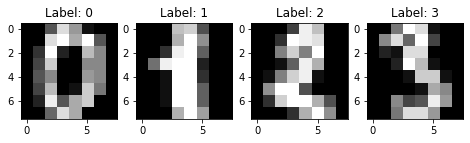

In [16]:
plt.figure(figsize=(10,2))
for index in range(0, 4):

    plt.subplot(1, 5, 1 + index)
    image_values = df_digits.loc[index, pixel_colnames].values
    image_label = df_digits.loc[index, 'label']
    plt.imshow(image_values.reshape(8,8), cmap ='gray')
    plt.title('Label: ' + str(image_label))

## Splitting Data into Training and Test Sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_digits[pixel_colnames], df_digits['label'], random_state=0)

## Standardize the Data
Logistic Regression can be effected by scale so you may need to scale the features in the data before using Logistic Regression. Otherwise, features with higher values will possibly have smaller weights than other ones. 

You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

### [Why should we scale the features in logistic regression?](https://datascience.stackexchange.com/questions/75116/how-does-scaling-affect-logistic-regression)

In [18]:
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [20]:
# multi_class is specifying one versus rest
clf = LogisticRegression(solver='liblinear',
                         multi_class='ovr', 
                         random_state = 0)

clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


[Find out more about the logistic regression terminology in scikit-learn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)



Both the training and test accuracies are very high. If you access the intercept terms by using the `intercept_` attribute, you can see that the array has four values. Since the Logistic Regression instance was fit on a multiclass dataset via the OvR approach, the first intercept belongs to the model that fits digit 0 versus digits 1,2, and 3. The second value is the intercept of the model that fits digit 1 versus digits 0,2, and 3. etc. 

In [22]:
clf.intercept_

array([-2.712674  , -3.54379096, -3.18367757, -2.623974  ])

## Predictions

In [23]:
# The second class is the highest score so it will be the prediction for this data
clf.predict_proba(X_test[0:1])
#class 1 has the highest score

array([[0.00183123, 0.98368966, 0.00536378, 0.00911533]])

In [24]:
clf.predict(X_test[0:1])

array([1])

I encourage you to try using logistic regression for multiclass classification for your dataset of choice.
Btw, you do not need to solely use logistic regression for multiclass classification.

Popular algorithms that can be used for multi-class classification include:

    k-Nearest Neighbors
    Decision Trees
    Naive Bayes
    Random Forest
    Gradient Boosting

# Decision Trees

One of the most important considerations when choosing a machine learning algorithm is how interpretable it is. The ability to explain how an algorithm makes predictions is useful to not only you, but also to potential stakeholders. Always think big.


A very interpretable machine learning algorithm is a decision tree which you can think of as a series of questions designed to assign a class or predict a continuous value depending on the task. The example image is a decision tree designed for classification.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data (training data). It can be used both for regression and classification.

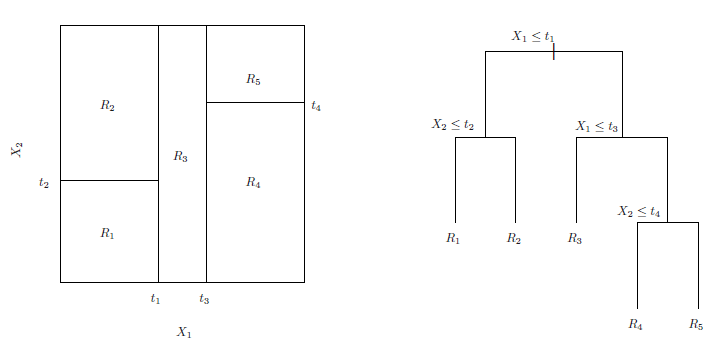

[More information on the decision tree algorithms](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html)


### So how do we decide which features are important for our decisions? 

#### Regression trees

1. For regression (decision) trees, we first select the predictor Xj and the cutpoint s such that splitting the predictor space into the regions {X|Xj < s} and {X|Xj ≥ s} leads to the greatest possible reduction in RSS (residual sum of squares), a metric that measures the amount of variance in a data set that is not explained by the model itself.

2.  That is, we consider all predictors X1, . . . , Xp, and all possible values of the cutpoint s for each of the predictors, and then choose the predictor and cutpoint such that the resulting tree has the lowest RSS.

3. In the next round, instead of splitting the entire predictor space, we split one of the two previously identified regions. We now have three regions. Again, we look to split one of these three regions further, so as to minimize the RSS. The process continues until a stopping criterion is reached; for instance, we may continue until no region contains more than five observations. Once the regions R1, . . . , RJ have been created, we predict the response for a given test observation using the mean of the training observations in the region to which that test observation belongs.

4. This way, we end up dividing the predictor space — that is, the set of possible values for X1, X2, . . . , Xp — into J distinct and non-overlapping regions, R1, R2, . . . , RJ.

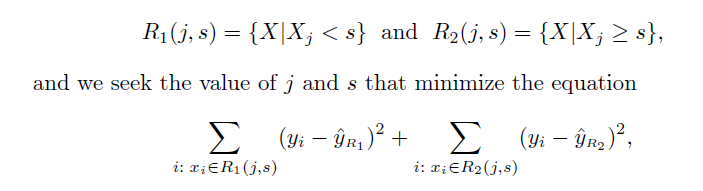

#### Classification trees

For classification decision trees, the concept is the same as regression trees, but instead of calculating RSS, we calculate classification error rate, such as Gini index or Entropy. 

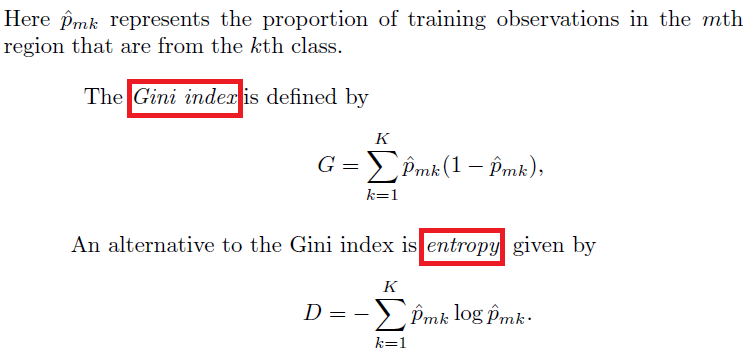

![image](../images/decisionTreeExample.png)


In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

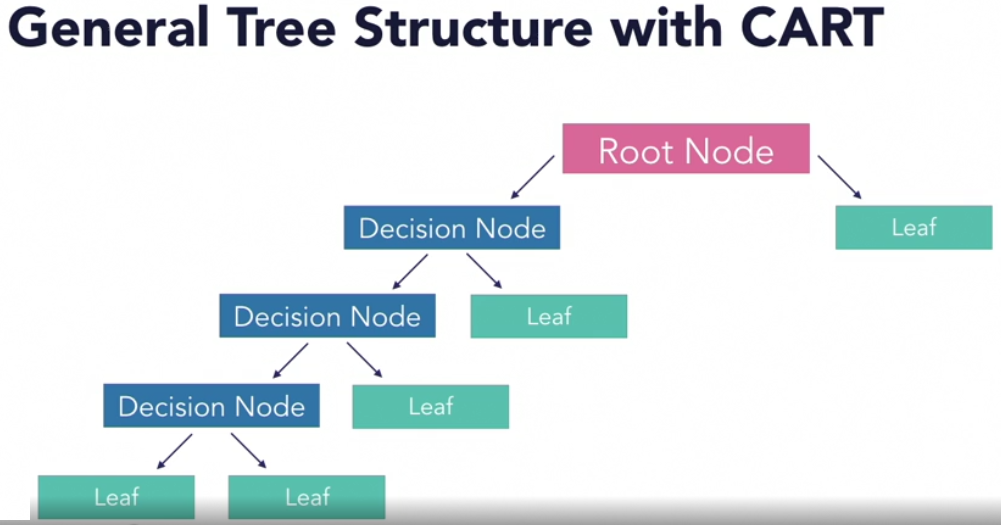

Let's say you want to buy a car. How do you make a decision? You would start with defining the most important features. 

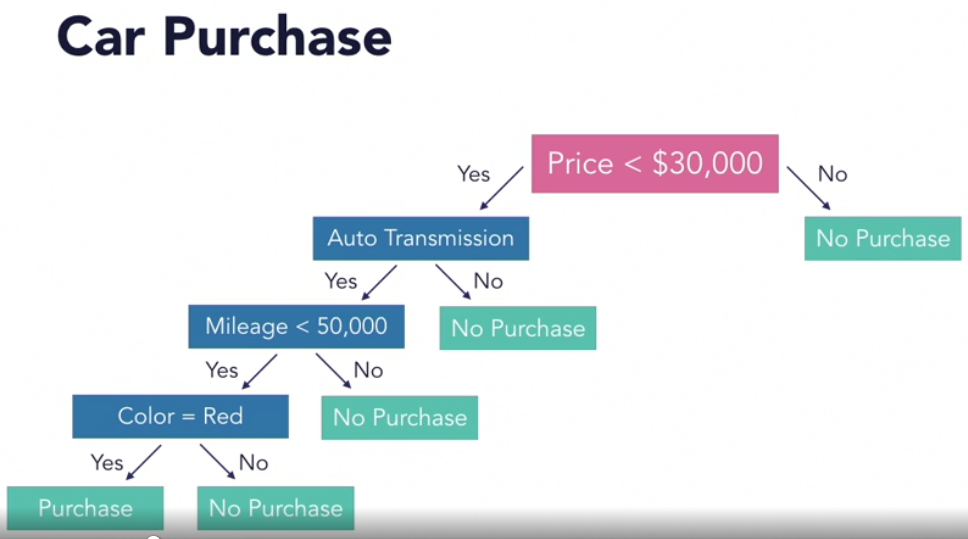

Now we will look into how you can create and tune a decision tree using scikit-learn. 

## Import Libraries

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

## Load the Dataset
The Iris dataset (which you by now know) is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [26]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting Data into Training and Test Sets

![images](../images/trainTestSplit.png)

The colors in the image indicate which variable (X_train, X_test, Y_train, Y_test) the data from the dataframe df went to for a particular train test split (not necessarily the exact split of the code below).

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

Note, another benefit of Decision Trees is that you don’t have to standardize your features unlike other algorithms like logistic regression and K-Nearest Neighbors. 

#### Action item for class: Find out why you do not need to scale features for decision trees. [Hint](https://www.quora.com/Decision-Tree-based-models-dont-require-scaling-How-does-scaling-impact-the-predictions-of-decision-tree-based-models) 

## Decision Tree


How do you understand how a decision tree makes predictions?
One of the strengths of decision trees are that they are relatively easy to interpret as you can make a visualization based on your model. This is not only a powerful way to understand your model, but also to communicate how your model works to stakeholders. 


Let's go ahead and plot Decision Trees with Matplotlib.

## Load the Dataset

In [30]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = data.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split Data into Training and Test Sets

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(df_iris[data.feature_names], df_iris['target'], random_state=0)

## Scikit-learn 4-Step Modeling Pattern

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

In [32]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features: sepal width, sepal height etc) and y (labels-which species of iris)

In [33]:
clf.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

<b>Step 4:</b> Predict the labels of new data (new flowers)

Uses the information the model learned during the model training process

In [34]:
# Predict for One Observation (image)
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([2])

Predict for Multiple Observations (images) at Once

In [35]:
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

## Measuring Model Performance 

In other words, evaluating the model on the test data

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [36]:
test_score = clf.score(X_test, Y_test)
train_score = clf.score(X_train, Y_train)
print('test_score: ', test_score)
print('train_score: ', train_score)

test_score:  0.8947368421052632
train_score:  0.9642857142857143


One drawback to note about decision trees: They tend to over fit. The model can not generalize well enough for new data.

Therefore it is not uncommon to get a higher score with training data than the test data.

It is good for us to interpret but it is prone to overfit. 

In [ ]:
y_test_pred = clf.predict(X_test)

# we can also look at other metrics
print(metrics.classification_report(y_test, y_test_pred))

## How to Visualize Decision Trees using Matplotlib

#### Default Visualization Based on the Model

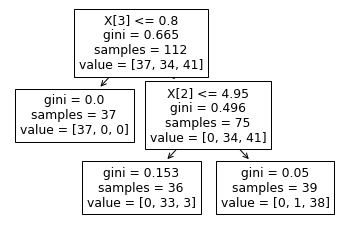

In [37]:
tree.plot_tree(clf);

#### Adjust Figure Size and Dots per inch (DPI)

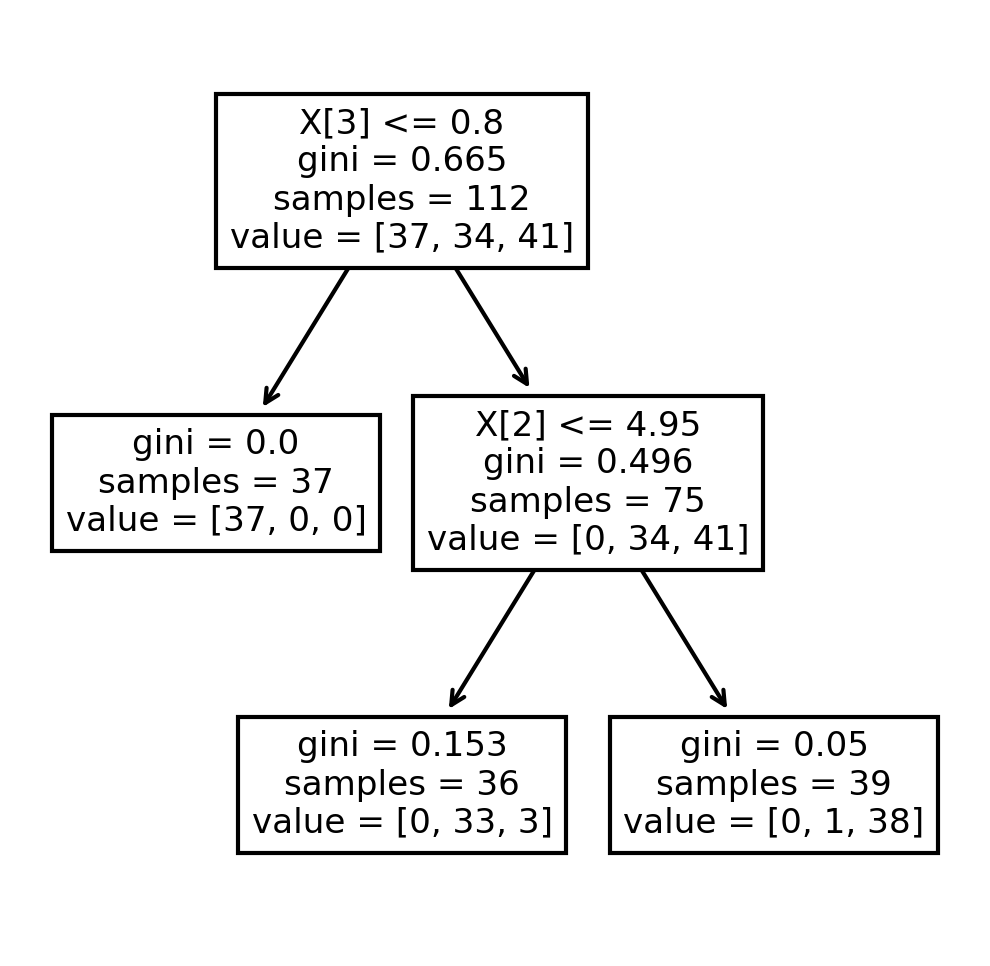

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);

#### Make Tree More Interpretable
The code below not only allows you to save a visualization based on your model, but also makes the decision tree more interpretable by adding in feature and class names.

In [39]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

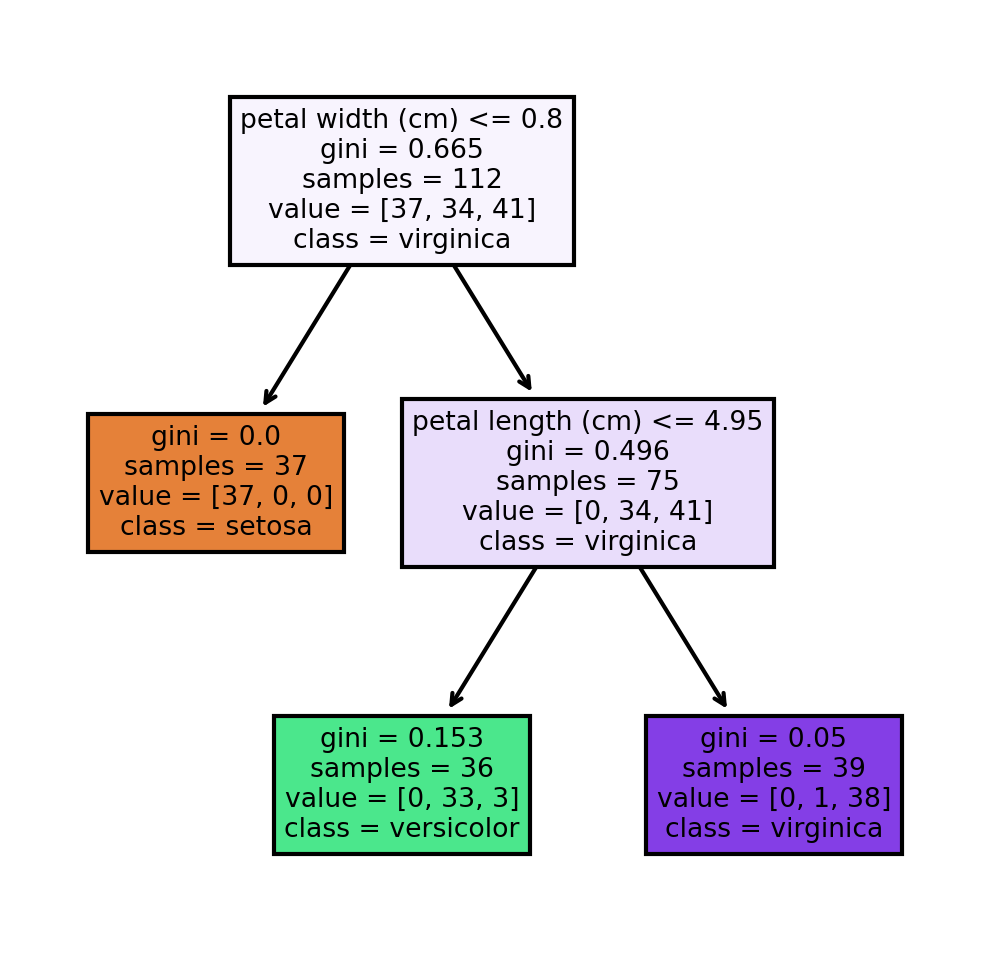

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('../Figures/plottreefncn.png')

## Finding the Optimal `max_depth`

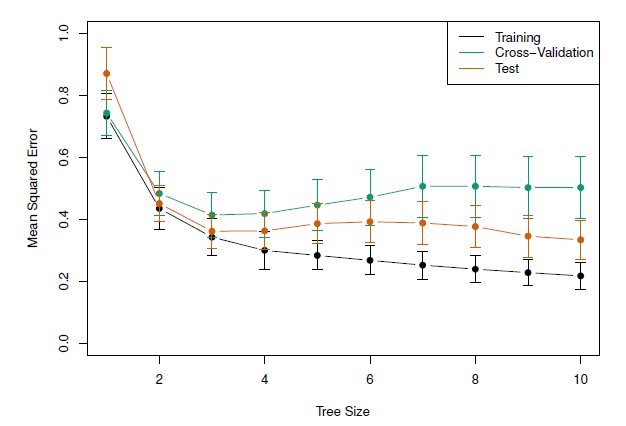

In [41]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# Initialize the list to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

/home/baloglu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


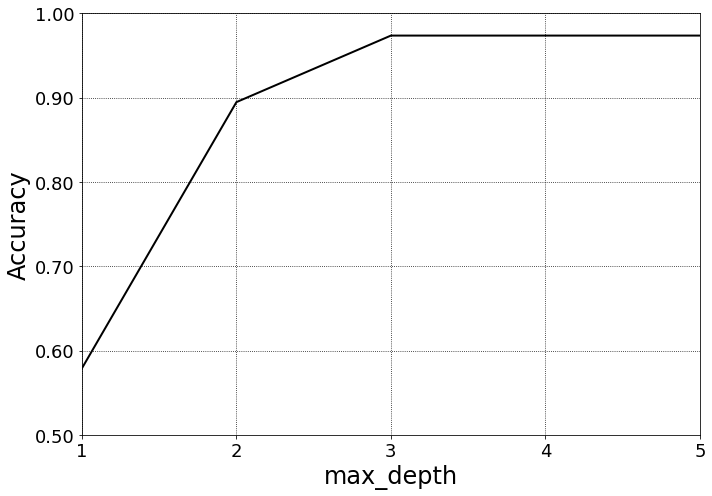

In [42]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('../Figures/max_depth_vs_accuracy.png', dpi = 300)

## So when to use regression models vs decision trees? Which model is better?

- It depends on the problem at hand. If the relationship between the features and the response is well approximated by a linear model, then an approach such as linear regression will likely work well, and will outperform a method such as a regression tree that does not exploit this linear structure. 
- If instead there is a highly nonlinear and complex relationship between the features and the response, then decision trees may outperform classical approaches.
- You can always compare the performances of tree-based and classical approaches by estimating the test error, using either cross-validation or the validation set approach.

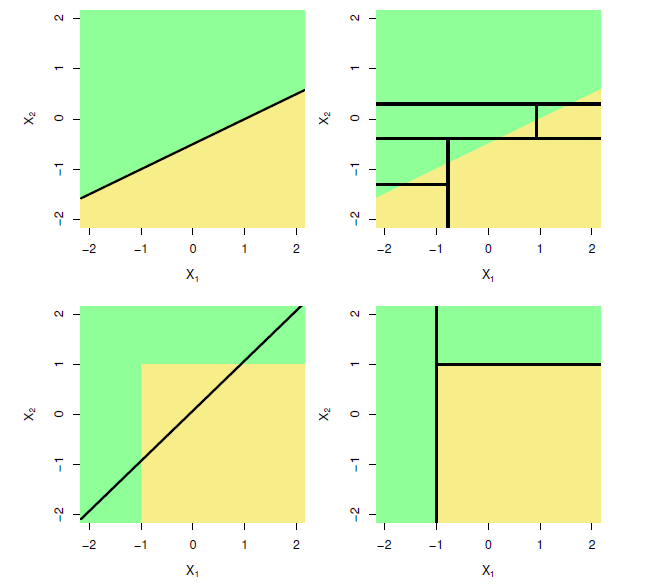

## Advantages and disadvantages of decision trees

### Advantages

- Trees are very easy to explain to people. In fact, they are even easier to explain than linear regression!
- Trees can be displayed graphically, and are easily interpreted even by a non-expert (especially if they are small).
- Trees can easily handle qualitative predictors without the need to create dummy variables.

### Disadvantages

- Unfortunately, trees generally do not have the same level of predictive accuracy as some of the other regression and classification approaches. 
- Additionally, trees can be very non-robust. In other words, a small change in the data can cause a large change in the final estimated tree.
- Trees are prone to overfitting.


# Random Forests

- Each machine learning algorithm has strengths and weaknesses. By aggregating many decision trees, we might be able to limit overfitting. With random forests, we build many decision trees and each time a split in a tree is considered, a random sample of m predictors is chosen as split candidates from the full set of p predictors. 

- Suppose that there is one very strong predictor in the data set, along with a number of other moderately strong predictors. Then in the collection of bagged trees, most or all of the trees will use this strong predictor in the top split. Consequently, all of the bagged trees will look quite similar to each other. Hence the predictions from the bagged trees will be highly correlated. Unfortunately, averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities. In particular, this means that bagging will not lead to a substantial reduction in variance over a single tree in this setting.

- While building a random forest, at each split in the tree, the algorithm is not even allowed to consider a majority of the available predictors. We can think of this process as decorrelating the trees, thereby making the average of the resulting trees less variable and hence more reliable.

- In short, Random Forests make the decision trees less correlated.  

![images](../images/randomForest.png)

Now we will look into how we can build a random forest model using Scikit-Learn. 

## Import Libraries

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

# Classifier Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# To visualize individual decision trees
from sklearn import tree
from sklearn.tree import export_text

## Load the Dataset
Remember our houses dataset?

A little reminder for you: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The code below loads the dataset. The goal of this dataset is to predict price based on features like number of bedrooms and bathrooms.

In [44]:
df_house = pd.read_csv('../datasets/kc_house_data.csv')

df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
# This notebook only selects a couple features for simplicity
# However, I encourage you to play with adding and substracting features
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']

X = df_house.loc[:, features] #features matrix

y = df_house.loc[:, 'price'].values #target vector

## Splitting Data into Training and Test Sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Note, another benefit of random forests like decision trees is that you don’t have to standardize your features unlike other algorithms like logistic regression and K-Nearest Neighbors. 

## Random Forest 

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.ensemble import RandomForestRegressor

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. 

In [47]:
reg = RandomForestRegressor(n_estimators=100, random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between X (features like number of bedrooms) and y (price)

In [48]:
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

<b>Step 4:</b> Predict the labels of new data (new flowers)

Uses the information the model learned during the model training process

In [49]:
# Returns a NumPy Array
# Predict for One Observation
reg.predict(X_test.iloc[0].values.reshape(1, -1))

array([354008.56])

Predict for Multiple Observations at Once

In [50]:
reg.predict(X_test[0:10])

array([ 354008.56,  999809.  ,  443760.25,  426332.  ,  760570.2 ,
        408775.5 ,  360030.14,  714794.4 ,  585902.14, 1665779.  ])

## Measuring Model Performance

In [56]:
# let's build the decision tree

clf = DecisionTreeClassifier(max_depth = 50, 
                             random_state = 0)

clf.fit(X_train, y_train)

clf.predict(X_test.iloc[0].values.reshape(1, -1))
clf.predict(X_test[0:10])

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('test_score: ' , test_score)
print('train_score: ' , train_score)

test_score:  0.0051813471502590676
train_score:  0.986920846443334


Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [52]:
# scores from random forest

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print('test_score: ' , test_score)
print('train_score: ' , train_score)

test_score:  0.577684658845681
train_score:  0.9340003452999048


## Visualizing Individual Decision Trees from a Bagged Tree and Random Forest Model
The purpose of this section is to show you that both ensemble models are really comprised of many decision trees.

In [58]:
# Load the Iris Dataset
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_iris[data.feature_names], df_iris['target'], random_state=0)

In [59]:
# Fit Bagged Tree Model
btc = BaggingClassifier(n_estimators=100, 
                        random_state = 1)

btc.fit(X_train, y_train)

# Fit Random Forest Model
rfc = RandomForestClassifier(n_estimators=100, random_state = 1)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

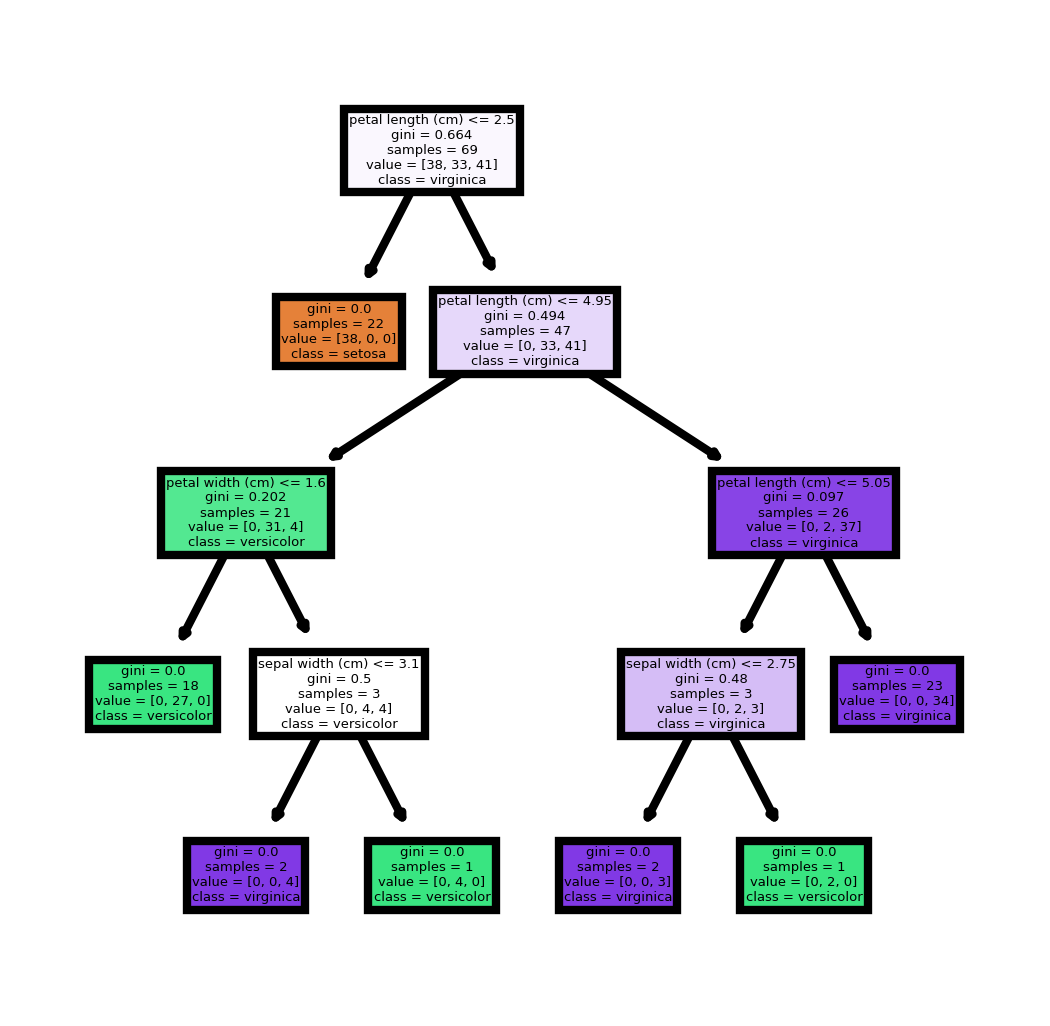

In [64]:
# Get the first decision tree for bagged tree model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=600)
tree.plot_tree(btc.estimators_[0],
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);

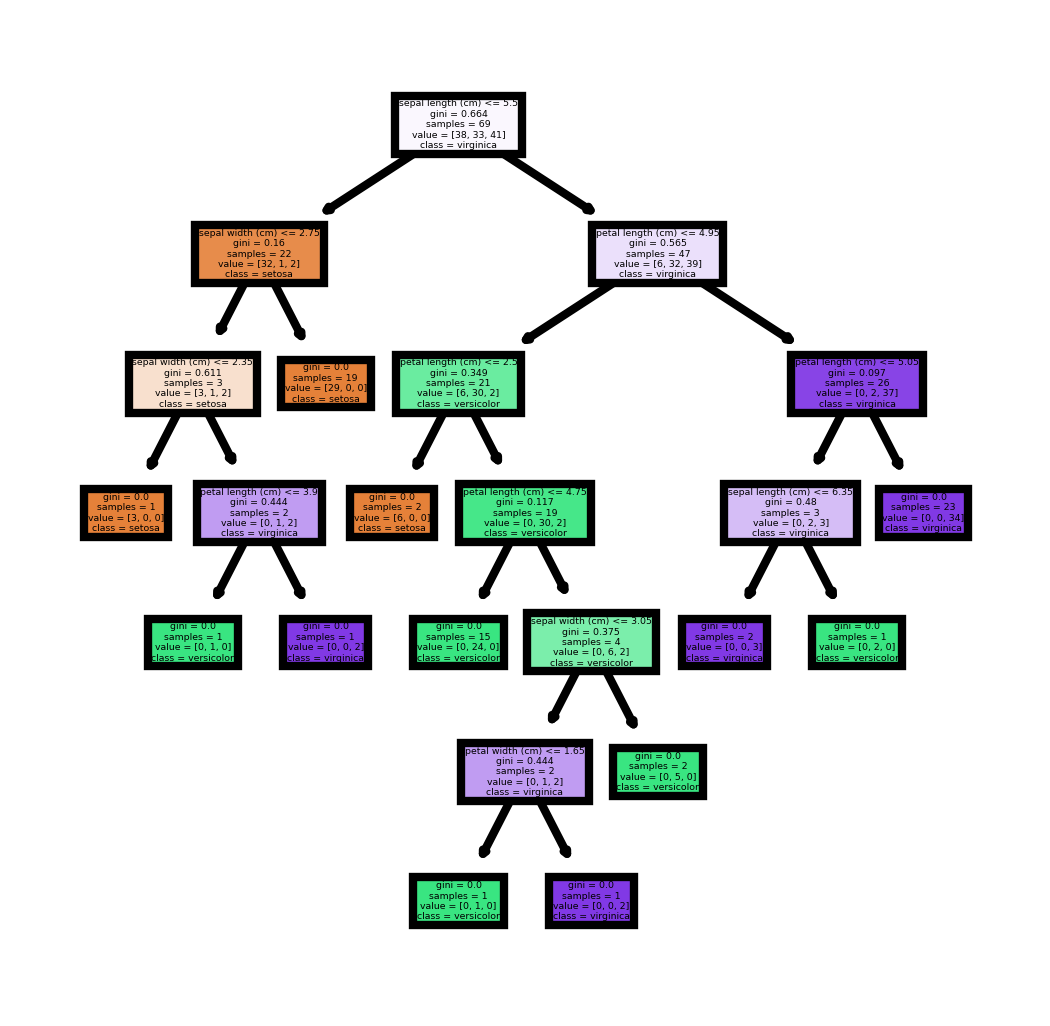

In [66]:
# Get the first decision tree for a random forest model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=600)
tree.plot_tree(rfc.estimators_[0],
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);

## Assessing feature importance with Random Forests
Random Forests give feature importance metrics. Like any metric, it isn't perfect. 

In [67]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [68]:
importances 
# random forest suggests that the petal length is the most important variable in this model

,feature,importance
2,petal length (cm),0.453
3,petal width (cm),0.385
0,sepal length (cm),0.139
1,sepal width (cm),0.023


Class labels [1 2 3]
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


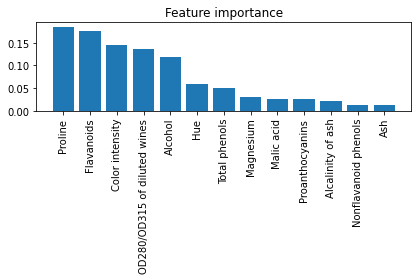

In [69]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
#what is this dataset about? 
#https://archive.ics.uci.edu/ml/datasets/wine

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()


from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values #what does this give us?

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)


import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, #what does number 30 do here?
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('../Figures/wine_feature_selection.png', dpi=300)
plt.show()

In [70]:
help(RandomForestClassifier.feature_importances_)

Help on property:

    The impurity-based feature importances.
    
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.
    
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.
    
    Returns
    -------
    feature_importances_ : ndarray of shape (n_features,)
        The values of this array sum to 1, unless all trees are single node
        trees consisting of only the root node, in which case it will be an
        array of zeros.



# KMeans Clustering

Clustering algorithms help identify distinct groups of data. An example is to use clustering to group customers based on their behavior. There are many clustering algorithms, but the most commonly used algorithm is K-Means. We will now look into how to use K-Means clustering to find some underlying structure in your data. 

## Import Libraries

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [ ]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris.head()

## Arrange Data into Features Matrix

K-Means is considered an unsupervised learning algorithm. This means you only need a features matrix. In the iris dataset, there are four features. In this notebook, the features matrix will only be two features as it is easier to visualize clusters in two dimensions. 

In [ ]:
features = ['petal length (cm)','petal width (cm)']

# Create features matrix
x = df_iris.loc[:, features].values

The variable y below is for demonstrational purposes in this notebook and not needed if you want to do K-Means. 

In [ ]:
y = data.target

## Standardize the Data
KMeans is effected by scale so you need to scale the features in the data before using KMeans. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. 

In [ ]:
# Apply Standardization to features matrix X
x = df_iris.loc[:, features].values

In [ ]:
x = StandardScaler().fit_transform(x)

## Plot Data to Estimate Number of Clusters
If your data is 2 or three dimensional, it is a good idea to plot your data before clustering. Hopefully you can see if there are any natural looking clusters. 

In [ ]:
# Plot 
pd.DataFrame(x, columns = features).plot.scatter('petal length (cm)','petal width (cm)' )

# Add labels
plt.xlabel('petal length (cm)');
plt.ylabel('petal width (cm)');

## KMeans Clustering
As you might remember from our class, in K-Means clustering, you need to specify the number of clusters (k) you want. 

In Scikit-Learn, this parameter is called `n_clusters`. In the case of the code below, the number of clusters is set to 3 because most people who use the Iris dataset happen to know there are three species. You will, of course, need to optimize this value for your own dataset. 

In [ ]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit only on a features matrix
kmeans.fit(x)

In [ ]:
# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_ #who remembers what this one was all about?

## Visually Evaluate the Clusters

In [ ]:
x = pd.DataFrame(x, columns = features)

In [ ]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');

## Visually Evaluate the Clusters and Compare Species

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colormap[labels])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('K-Means Clustering (k = 3)')
 
plt.subplot(1, 2, 2)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colormap[y], s=40)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('Flower Species')

plt.tight_layout()

They look pretty similar. Looks like KMeans picked up flower differences with only two features and not the labels. The colors are different in the two graphs simply because KMeans gives out a arbitrary cluster number and the iris dataset has an arbitrary number in the target column. 

KMeans is a popular clustering algorithm that you can use to find structure in your data. 

# Principal Component Analysis

Are all the features in your dataset needed? Say you have some flowers and you measured their petal length. If you have a column of that measurement in centimeters and another column with the measurement in inches, do you need both columns? 

In this scenario, you can probably drop either column without losing information. In other cases, dropping a column could lead to issues. As you remember from our lecture, principal component analysis, better known as PCA, is a technique that you can use to reduce the dimensionality of your dataset while losing the least amount of information possible. 

One use of PCA is for data visualization. Let's now look into how you can use PCA to help visualize your data. 

## PCA for data visualization

## Import Libraries

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

## Load the Dataset

In [ ]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = data.target

In [ ]:
speciesDict = {0: 'setosa', 1:'versicolor', 2:'virginica'} # what were the other ways to create a dictionary?

df_iris.loc[:,'target'] = df_iris.loc[:, 'target'].apply(lambda x: speciesDict[x]) # who remembers lambda functions?

In [ ]:
df_iris.head()

## Standardize the Data
[PCA is effected by scale](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) so you need to scale the features in the data before using PCA. And why is that? 

- In PCA we are interested in the components that maximize the variance. 
- If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. 
- As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. 

In [ ]:
# Apply Standardization to features matrix X
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
x = df_iris.loc[:, features].values
y = df_iris.loc[:,['target']].values

In [ ]:
#PCA is an unsupervised learning algorithm, it means that we only fit it on the features matrix
x = StandardScaler().fit_transform(x)

## PCA Projection to 2D
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). The code below projects the original data which is 4 dimensional into 2 dimensions. FYI, after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [ ]:
# Make an instance of PCA
pca = PCA(n_components=2) # feel free to change the number of dimensions

# Fit and transform the data
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

## Visualize 2D Projection
PCA projection to 2D to visualize the entire data set. 

In [ ]:
finalDf = pd.concat([principalDf, df_iris[['target']]], axis = 1)

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8));
targets = df_iris.loc[:, 'target'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)    
ax.legend(targets)
ax.grid()

From the graph, it looks like the setosa class is well separated from the versicolor and virginica classes.

## Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components. 

This is important because as you convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information).

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

Together, the two principal components contain about 96% of the information. The first principal component contains about 73% of the variance. The second principal component contains about 23% of the variance. 

As you can see, PCA can be used to help visualize your data. Feel free to use it as a standalone tool or for feature reduction before running your choice of another model.

## PCA for speeding up the process

PCA is not only used for data visualization as mentioned, but also for speeding up the fitting of your machine learning algorithm. Scikit-learn offers quite a few ways to do this. One way is to reduce the number of rows or columns in your data. However, you will not necessarily know which rows and especially which columns to remove. 

PCA to the rescue! Now we will look into how we can use principal component analysis to speed up the fitting of a logistic regression model. 

## Import Libraries

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## Load the Dataset
The dataset is a modified version of the MNIST dataset that contains 2000 labeled images of each digit 0 and 1. The images are 28 pixels by 28 pixels. 

Parameters | Number
--- | ---
Classes | 2 (digits 0 and 1)
Samples per class | 2000 samples per class
Samples total | 4000
Dimensionality | 784 (28 x 28 images)
Features | integers values from 0 to 255

For convenience, you can also import the csv file directly.

In [ ]:
df_digits = pd.read_csv('../datasets/MNISTonly0_1.csv')

In [ ]:
df_digits.head()

## Visualize Each Digit

In [ ]:
pixel_colnames = df_digits.columns[:-1]

In [ ]:
# Get all columns except the label column for the first image
image_values = df_digits.loc[0, pixel_colnames].values

In [ ]:
plt.figure(figsize=(8,4))
for index in range(0, 2):

    plt.subplot(1, 2, 1 + index )
    image_values = df_digits.loc[index, pixel_colnames].values
    image_label = df_digits.loc[index, 'label']
    plt.imshow(image_values.reshape(28,28), cmap ='gray')
    plt.title('Label: ' + str(image_label), fontsize = 18)

## Splitting Data into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_digits[pixel_colnames], df_digits['label'], random_state=0)

## Standardize the Data
PCA and logistic regression are sensitive to the scale of your features. You can standardize your data onto unit scale (mean = 0 and variance = 1) by using Scikit-Learn's `StandardScaler`. 

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Variable created for demonstrational purposes in the notebook
scaledTrainImages = X_train.copy()

## PCA then Logistic Regression

In [ ]:
"""
n_components = .90 means that scikit-learn will choose the minimum number 
of principal components such that 90% of the variance is retained.
"""

pca = PCA(n_components = .90)

# Fit PCA on training set only
pca.fit(X_train)

# Apply the transforming to both the training set and the test set
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Number of dimensions before PCA: ' + str(len(pixel_colnames))) # 28x28
print('Number of dimensions after PCA: ' + str(pca.n_components_))
print('Classification accuracy: ' + str(clf.score(X_test, y_test)))

## Relationship between Cumulative Explained Variance and Number of Principal Components

The code in the following section shows the level of redundancy present in multiple dimensions.

In [ ]:
# if n_components is not set, all components are kept (784 in this case)
pca = PCA()

pca.fit(scaledTrainImages)

# Summing explained variance
tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));
ax.tick_params(labelsize = 18)
ax.plot(range(1, 785), cum_var_exp, label='cumulative explained variance')
ax.set_ylabel('Cumulative Explained variance', fontsize = 16)
ax.set_xlabel('Principal components', fontsize = 16)
ax.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
ax.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
ax.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
ax.legend(loc='best', markerscale = 1.0, fontsize = 12)

As you can see, PCA can be used to speed up the fitting of your algorithm by reducing the number of redundant features. 

# Pipelines

Machine learning is not always about applying a single machine learning algorithm. For a lot of machine learning applications, you will need to apply various data processing steps, data transformations, and potentially multiple machine learning algorithms. This can lead to a lot of code. The question becomes, how do you keep your code organized and as bug free as possible? 

Therefore, we will now look into how you can use pipelines in scikit-learn to make your code cleaner and more resilient to bugs. Feel free to integrate pipelines when you build your model(s).

To demonstrate the utility of pipelines, the below code shows how much less code you need to chain together pca and logistic regression for image classification.

## Import Libraries

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## Load the Dataset
The dataset is a modified version of the MNIST dataset that contains 2000 labeled images of each digit 0 and 1. The images are 28 pixels by 28 pixels. 

Parameters | Number
--- | ---
Classes | 2 (digits 0 and 1)
Samples per class | 2000 samples per class
Samples total | 4000
Dimensionality | 784 (28 x 28 images)
Features | integers values from 0 to 255

Let's import the csv file.

In [ ]:
df_digits = pd.read_csv('../datasets/MNISTonly0_1.csv')

In [ ]:
df_digits.head()

## Without Pipeline
Notice how many steps this takes. There are quite a few places where an error could occur. 

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_digits[df_digits.columns[:-1]], df_digits['label'], random_state=0)

# Standardize Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components = .90, random_state=0)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Apply Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Get Model Performance
print(clf.score(X_test, y_test))

## With Pipelines

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_digits[df_digits.columns[:-1]], df_digits['label'], random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('logistic', LogisticRegression())])

pipe.fit(X_train, y_train)

# Get Model Performance
print(pipe.score(X_test, y_test))

## Visualize Pipeline

In [ ]:
from sklearn import set_config

set_config(display='diagram')
pipe

We are now ready for building models using datasets more relevant to genomics. 

Let's make sure to use pipelines when writing our code to make it more organized and easier to understand. 